In [1]:
from selenium import webdriver
from selenium.webdriver import ActionChains
from bs4 import BeautifulSoup
import pandas as pd
browser = webdriver.Chrome()
#정왕동에서 시작
browser.get("https://new.land.naver.com/complexes/1878?ms=37.33995,126.7427545,17&a=APT:ABYG:JGC&e=RETAIL")


import time
#아래 팝업창 뜨게 하기(아래 세모버튼 누르기?) xpath 사용
browser.find_element_by_xpath('//*[@id="region_filter"]/div/a/span[4]').click()
time.sleep(3)

apt_data=[] #아파트 데이터를 담는 리스트
no_apt_data=[] #불러오지 못한 아파트 이름을 담는 리스트
#순차적으로 아래있는것을 클릭하게 함
for i in range(1, 67):  #range의 1 다음의 수(11)을 바꿔 몇번 반복할지 설정 할 수 있다.
    pead_path = '//*[@id="region_filter"]/div/div/div[3]/ul/li[{0}]/a'.format(i)
    pead = browser.find_element_by_xpath(pead_path).click()
    time.sleep(3)
    
    #광고가 뜨면 아파트 이름이 인식이 안되므로 try except 문 사용
    try:
        browser.find_element_by_css_selector("div.item_inner").click()
        time.sleep(2)
        #아파트 이름
        apt_name_path = 'div.main_info_area > div.info_title_wrap > h4 > strong'
        apt_name = browser.find_element_by_css_selector(apt_name_path)
        name = apt_name.text.split(" ")[0]
        
        #매매, 전세, 월세 구분
        apt_type_path = 'div.main_info_area > div.info_article_price > span.type'
        apt_type = browser.find_element_by_css_selector(apt_type_path)
        typ = apt_type.text
        
        #아파트 가격
        apt_price_path = 'div.main_info_area > div.info_article_price > span.price'
        apt_price = browser.find_element_by_css_selector(apt_price_path)
        price = apt_price.text
        
        #아파트 방향
        apt_way_path = 'div.detail_box--summary > table > tbody > tr:nth-child(6) > td'
        apt_way = browser.find_element_by_css_selector(apt_way_path)
        way = apt_way.text
        
        #관리비
        apt_mange_path = 'div.detail_box--summary > table > tbody > tr:nth-child(4) > td:nth-child(2)'
        apt_mange = browser.find_element_by_css_selector(apt_mange_path)
        mange = apt_mange.text
        
        #매물특징
        apt_feature_path = '//*[@id="detailContents1"]/div[1]/table/tbody/tr[1]/td'
        apt_feature = browser.find_element_by_xpath(apt_feature_path)
        feature = apt_feature.text
        
        #평수클릭
        browser.find_element_by_xpath('//*[@id="tabArea"]/button').click()
        time.sleep(1)
        #평수
        apt_space_path = 'div.detail_box--summary > table > tbody > tr:nth-child(2) > td'
        apt_space = browser.find_element_by_css_selector(apt_space_path)
        space = apt_space.text
        
        #층수
        apt_floor_path = 'div.detail_box--summary > table > tbody > tr:nth-child(3) > td:nth-child(2)'
        apt_floor = browser.find_element_by_css_selector(apt_floor_path)
        floor = apt_floor.text
        
        #학군정보 클릭
        browser.find_element_by_css_selector('.tab_area_list #detailTab4  span.text').click()
        time.sleep(2)
        #학군정보 학교이름
        school_name_path = '#detailContents5 > div > div.detail_box--school > div.heading > h5'
        school_name = browser.find_element_by_css_selector(school_name_path)
        school = school_name.text
        
        #학군정보 학교까지 거리
        school_distance_path = '//*[@id="detailContents5"]/div/div[1]/div[2]/div[2]/div[2]'
        school_distance = browser.find_element_by_xpath(school_distance_path)
        distance = school_distance.text
        
        #x버튼 누르기
        browser.find_element_by_css_selector("div.detail_panel > div > button").click()
        time.sleep(2)
        
        #아래 팝업창 뜨게 하기(아래 세모버튼 누르기?) xpath 사용
        browser.find_element_by_xpath('//*[@id="region_filter"]/div/a/span[4]').click()
        time.sleep(2)
        
        print(name, typ, price, way, mange, feature, space, floor, school, distance)
        apt_data.append([name, typ, price, way, mange, feature, space, floor, school, distance])
        
        
    #아파트 이름을 찾지 못할 때 x버튼을 누르고 다음 아파트 검색
    except:
        #x버튼 누르기
        browser.find_element_by_css_selector("div.detail_panel > div > button").click()
        time.sleep(2)
        #아래 팝업창 뜨게 하기(아래 세모버튼 누르기?) xpath 사용
        browser.find_element_by_xpath('//*[@id="region_filter"]/div/a/span[4]').click()
        time.sleep(2)
        test1_path = '//*[@id="region_filter"]/div/div/div[3]/ul/li[{0}]/a/span'.format(i)
        test1 = browser.find_element_by_xpath(test1_path)
        test2=test1.text
        print("불러오지 못한 아파트", test2)
        no_apt_data.append([test2])
  
      

C:\Users\lhk65\anaconda3\envs\selenium\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  if sys.path[0] == '':
C:\Users\lhk65\anaconda3\envs\selenium\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
C:\Users\lhk65\anaconda3\envs\selenium\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
C:\Users\lhk65\anaconda3\envs\selenium\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
C:\Users\lhk65\anaconda3\envs\selenium\lib\site-packages\ipykernel_launcher.py:34: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
C:\Users\lhk65\anaconda3\envs\selenium\lib\site-packages\ipykernel_launcher.

건영1차 매매 4억 남서향(거실 기준) 18만원 깨끗한집 이사는 빨리도 가능 32.89평/25.69평(전용률78%) 2/10층 정왕초등학교 도보로 4분


C:\Users\lhk65\anaconda3\envs\selenium\lib\site-packages\ipykernel_launcher.py:98: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead


WebDriverException: Message: chrome not reachable
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00BA6463+2188387]
	Ordinal0 [0x00B3E461+1762401]
	Ordinal0 [0x00A53C40+801856]
	Ordinal0 [0x00A48932+756018]
	Ordinal0 [0x00A49168+758120]
	Ordinal0 [0x00A4AA22+764450]
	Ordinal0 [0x00A44379+738169]
	Ordinal0 [0x00A550D0+807120]
	Ordinal0 [0x00AAC402+1164290]
	Ordinal0 [0x00A9C5F6+1099254]
	Ordinal0 [0x00A76BE0+945120]
	Ordinal0 [0x00A77AD6+948950]
	GetHandleVerifier [0x00E471F2+2712546]
	GetHandleVerifier [0x00E3886D+2652765]
	GetHandleVerifier [0x00C3002A+520730]
	GetHandleVerifier [0x00C2EE06+516086]
	Ordinal0 [0x00B4468B+1787531]
	Ordinal0 [0x00B48E88+1805960]
	Ordinal0 [0x00B48F75+1806197]
	Ordinal0 [0x00B51DF1+1842673]
	BaseThreadInitThunk [0x76BF6739+25]
	RtlGetFullPathName_UEx [0x776D8FEF+1215]
	RtlGetFullPathName_UEx [0x776D8FBD+1165]


In [2]:
#불러오지 못한 아파트 이름을 담는 리스트
no_apt_data

[['승창(도시형)'],
 ['시화MTV파라곤'],
 ['시화서촌마을건영3차'],
 ['시흥금강펜테리움오션베이'],
 ['신한토탈'],
 ['영남2차'],
 ['영남5차'],
 ['오성(도시형)'],
 ['주공3단지'],
 ['호반써밋더퍼스트시흥'],
 ['호반써밋더프라임']]

In [3]:
#아파트 데이터를 담는 리스트
apt_data

[['건영1차',
  '전세',
  '3억 3,000',
  '남서향(거실 기준)',
  '12만원',
  '올수리되어 아주깨끗한집 .학교,상권가까워서 생활편리합니다.빠른입주가능',
  '32.89평/25.69평(전용률78%)',
  '10/10층',
  '정왕초등학교',
  '도보로 4분'],
 ['건영2차',
  '매매',
  '3억 8,000',
  '남동향(거실 기준)',
  '18만원',
  '올수리 올확장 전세끼고매매 협의',
  '32.89평/25.69평(전용률78%)',
  '10/10층',
  '송운초등학교',
  '도보로 6분'],
 ['계룡1차',
  '매매',
  '4억 3,000',
  '남서향(거실 기준)',
  '15만원',
  '약간수리된집 전망굿 상가인접생활권좋음',
  '32.39평/25.7평(전용률79%)',
  '4/10층',
  '서촌초등학교',
  '도보로 5분'],
 ['계룡2차',
  '매매',
  '3억',
  '남서향(거실 기준)',
  '13만원',
  '공시지가1억미만 투자물건',
  '22.01평/18.1평(전용률82%)',
  '5/5층',
  '서해초등학교',
  '도보로 8분'],
 ['고합',
  '매매',
  '2억 8,500',
  '남서향(거실 기준)',
  '13만원',
  '전체올수리. 거실확장. 안방붙박이장. 이사협의. 조정가',
  '22.24평/18.13평(전용률82%)',
  '4/5층',
  '송운초등학교',
  '도보로 6분'],
 ['금강',
  '매매',
  '3억 3,000',
  '남동향(거실 기준)',
  '12만원',
  '올수리되어 아주깨끗 이마트상권 초중교인접',
  '22.36평/18.14평(전용률81%)',
  '4/5층',
  '정왕초등학교',
  '도보로 6분'],
 ['대림1단지',
  '매매',
  '4억 6,000',
  '남서향(거실 기준)',
  '20만원',
  '세낀투자매물 올수리된깨끗한집 상권.교통.주변환경좋은매물 투자가치너무좋아요',
  '32.

In [4]:
#불러오지 못한 아파트 갯수를 불러온다
no=len(no_apt_data)
print(no)

11


In [5]:
from selenium import webdriver
from bs4 import BeautifulSoup
driver = webdriver.Chrome()
url = "https://new.land.naver.com/complexes/1878?ms=37.33995,126.7427545,17&a=APT:ABYG:JGC&e=RETAIL"
driver.get(url)


#웹 페이지의 HTML 정보 가져오기
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [6]:
#총 몇개의 아파트 목록이 있는지 검색
from selenium import webdriver
import time

url = "https://new.land.naver.com/complexes/113317?ms=37.3525,126.7279,16&a=APT:ABYG:JGC&e=RETAIL"
driver.get(url)
driver.find_element_by_xpath('//*[@id="region_filter"]/div/a/span[4]').click()
time.sleep(1)
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')
time.sleep(3)
prod_items = soup.select('a.complex_item_inner')
len(prod_items)

C:\Users\vvclu\anaconda3\envs\selinium\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  import sys


66

In [7]:
#변수에 저장
no_item_list = len(prod_items)
no_item_list

66

In [8]:
#불러온 아파트 갯수를 반환해주는 함수
def no_find_apt():
    no_find_list = no_item_list - no
    return no_find_list

no_find_apt()
    
    

55

In [9]:
print("전체", no_item_list, "개 중에 출력된 아파트는", no_find_apt(), "개, 출력하지 못한 아파트는", no, "개 입니다.")

전체 66 개 중에 출력된 아파트는 55 개, 출력하지 못한 아파트는 11 개 입니다.


In [10]:
#pandas로 정리 후 액셀로 저장
from pandas import Series, DataFrame
import pandas as pd
columns = ['이름', '구분', '가격', '방향', '관리비', '매물특징', '평수', '층수', '학교명', '학교까지 거리']
pd_data = pd.DataFrame(apt_data, columns = columns)
display(pd_data)
pd_data.to_excel('./mange1.xlsx', index = False)



,이름,구분,가격,방향,관리비,매물특징,평수,층수,학교명,학교까지 거리
0,건영1차,전세,"3억 3,000",남서향(거실 기준),12만원,"올수리되어 아주깨끗한집 .학교,상권가까워서 생활편리합니다.빠른입주가능",32.89평/25.69평(전용률78%),10/10층,정왕초등학교,도보로 4분
1,건영2차,매매,"3억 8,000",남동향(거실 기준),18만원,올수리 올확장 전세끼고매매 협의,32.89평/25.69평(전용률78%),10/10층,송운초등학교,도보로 6분
2,계룡1차,매매,"4억 3,000",남서향(거실 기준),15만원,약간수리된집 전망굿 상가인접생활권좋음,32.39평/25.7평(전용률79%),4/10층,서촌초등학교,도보로 5분
3,계룡2차,매매,3억,남서향(거실 기준),13만원,공시지가1억미만 투자물건,22.01평/18.1평(전용률82%),5/5층,서해초등학교,도보로 8분
4,고합,매매,"2억 8,500",남서향(거실 기준),13만원,전체올수리. 거실확장. 안방붙박이장. 이사협의. 조정가,22.24평/18.13평(전용률82%),4/5층,송운초등학교,도보로 6분
5,금강,매매,"3억 3,000",남동향(거실 기준),12만원,올수리되어 아주깨끗 이마트상권 초중교인접,22.36평/18.14평(전용률81%),4/5층,정왕초등학교,도보로 6분
6,대림1단지,매매,"4억 6,000",남서향(거실 기준),20만원,세낀투자매물 올수리된깨끗한집 상권.교통.주변환경좋은매물 투자가치너무좋아요,32.21평/25.68평(전용률80%),3/10층,서해초등학교,도보로 8분
7,대림2단지,매매,"2억 5,000",남서향(거실 기준),8만원,특올수리 방 거실확장 씽크대 화장실 올수샷시도공시지가1억이하,18.96평/15.49평(전용률82%),5/5층,서촌초등학교,도보로 3분
8,대림3단지,매매,"6억 5,000",계단식,"2억4,600만원",공원뷰가 예쁜집입니다.,42.6평/35.46평(전용률83%),1/10층,함현초등학교,도보로 5분
9,대림4단지,매매,"5억 6,000",남동향(거실 기준),24만원,"특올수리한집, 역세권, 급매물",42.6평/35.46평(전용률83%),1/10층,함현초등학교,도보로 2분


In [11]:
#액셀의 특정열 리스트로 변환하기(이름, 관리비)
from openpyxl import load_workbook


read_xlsx = load_workbook('mange1.xlsx')
read_sheet = read_xlsx.active


name_col = read_sheet['E']
names = []
for cell in name_col:
    names.append(cell.value)
print(names)
name1_col = read_sheet['A']
realNames = []
for cell1 in name1_col:
    realNames.append(cell1.value)
print(realNames)


['관리비', '12만원', '18만원', '15만원', '13만원', '13만원', '12만원', '20만원', '8만원', '2억4,600만원', '24만원', '없음', '15만원', '19.9305만원', '21만원', '10만원', '-', '10만원', '4만원', '15만원', '-', '21만원', '19만원', '13만원', '20만원', '20.7만원', '-', '13만원', '25만원', '16만원', '20만원', '6만원', '15만원', '17만원', '10만원', '10만원', '15만원', '20만원', '19만원', '15만원', '13만원', '16만원', '13만원', '18만원', '20만원', '10만원', '15만원', '21만원', '13만원', '15만원', '14만원', '13만원', '10만원', '10만원', '12만원', '없음']
['이름', '건영1차', '건영2차', '계룡1차', '계룡2차', '고합', '금강', '대림1단지', '대림2단지', '대림3단지', '대림4단지', '대우', '동남', '동보', '동원', '두산', '모아', '무진', '문영센스빌', '미주', '보성', '부성파스텔', '삼성', '삼환', '서촌마을건영4단지', '서촌마을영화하이닉스', '서해1차', '서해2차', '세종1차', '세종2차', '세종3차', '스카이드림씨티(도시형)', '시화유천', '시화평안마을건영5차', '신동아1단지', '신동아2단지', '신우', '신호새피앙', '아주', '영남1차', '영남3차', '영남4차', '영남6차', '옥구마을건영7차', '요진', '월드', '주공1단지', '주공2단지', '주공4단지', '주공5단지', '주공6단지', '진로', '청솔', '한신', '한일', '화성']


In [12]:
#이름과 관리비 리스트에서 필요없는 부분 제거
names.remove('관리비')
print(names)
realNames.remove('이름')
print(realNames)

['12만원', '18만원', '15만원', '13만원', '13만원', '12만원', '20만원', '8만원', '2억4,600만원', '24만원', '없음', '15만원', '19.9305만원', '21만원', '10만원', '-', '10만원', '4만원', '15만원', '-', '21만원', '19만원', '13만원', '20만원', '20.7만원', '-', '13만원', '25만원', '16만원', '20만원', '6만원', '15만원', '17만원', '10만원', '10만원', '15만원', '20만원', '19만원', '15만원', '13만원', '16만원', '13만원', '18만원', '20만원', '10만원', '15만원', '21만원', '13만원', '15만원', '14만원', '13만원', '10만원', '10만원', '12만원', '없음']
['건영1차', '건영2차', '계룡1차', '계룡2차', '고합', '금강', '대림1단지', '대림2단지', '대림3단지', '대림4단지', '대우', '동남', '동보', '동원', '두산', '모아', '무진', '문영센스빌', '미주', '보성', '부성파스텔', '삼성', '삼환', '서촌마을건영4단지', '서촌마을영화하이닉스', '서해1차', '서해2차', '세종1차', '세종2차', '세종3차', '스카이드림씨티(도시형)', '시화유천', '시화평안마을건영5차', '신동아1단지', '신동아2단지', '신우', '신호새피앙', '아주', '영남1차', '영남3차', '영남4차', '영남6차', '옥구마을건영7차', '요진', '월드', '주공1단지', '주공2단지', '주공4단지', '주공5단지', '주공6단지', '진로', '청솔', '한신', '한일', '화성']


In [13]:
#관리비 리스트에서 뒤에 만원 글자 제거
search = '만원'
for i, word in enumerate(names):
    if search in word: 
        print('>> modify: ' + word)
        names[i] = word.strip(search)
print(names)

>> modify: 12만원
>> modify: 18만원
>> modify: 15만원
>> modify: 13만원
>> modify: 13만원
>> modify: 12만원
>> modify: 20만원
>> modify: 8만원
>> modify: 2억4,600만원
>> modify: 24만원
>> modify: 15만원
>> modify: 19.9305만원
>> modify: 21만원
>> modify: 10만원
>> modify: 10만원
>> modify: 4만원
>> modify: 15만원
>> modify: 21만원
>> modify: 19만원
>> modify: 13만원
>> modify: 20만원
>> modify: 20.7만원
>> modify: 13만원
>> modify: 25만원
>> modify: 16만원
>> modify: 20만원
>> modify: 6만원
>> modify: 15만원
>> modify: 17만원
>> modify: 10만원
>> modify: 10만원
>> modify: 15만원
>> modify: 20만원
>> modify: 19만원
>> modify: 15만원
>> modify: 13만원
>> modify: 16만원
>> modify: 13만원
>> modify: 18만원
>> modify: 20만원
>> modify: 10만원
>> modify: 15만원
>> modify: 21만원
>> modify: 13만원
>> modify: 15만원
>> modify: 14만원
>> modify: 13만원
>> modify: 10만원
>> modify: 10만원
>> modify: 12만원
['12', '18', '15', '13', '13', '12', '20', '8', '2억4,600', '24', '없음', '15', '19.9305', '21', '10', '-', '10', '4', '15', '-', '21', '19', '13', '20', '20.7', '-', '13', '25', '16', '20', '6'

In [14]:
#값이 없는것과 '-'인 값을 0으로 변환
def change_names(names):
    for index, value in enumerate(names):
        if value == '없음':
          names[index] = 0
        if value == '-':
          names[index] = 0
        if value == '2억4,600':
          names[index] = 0
change_names(names)

In [15]:
names

['12',
 '18',
 '15',
 '13',
 '13',
 '12',
 '20',
 '8',
 0,
 '24',
 0,
 '15',
 '19.9305',
 '21',
 '10',
 0,
 '10',
 '4',
 '15',
 0,
 '21',
 '19',
 '13',
 '20',
 '20.7',
 0,
 '13',
 '25',
 '16',
 '20',
 '6',
 '15',
 '17',
 '10',
 '10',
 '15',
 '20',
 '19',
 '15',
 '13',
 '16',
 '13',
 '18',
 '20',
 '10',
 '15',
 '21',
 '13',
 '15',
 '14',
 '13',
 '10',
 '10',
 '12',
 0]

In [16]:
#관리비 리스트에서 문자열을 float형으로 변환
mange_int = list(map(float, names))
print(mange_int)


[12.0, 18.0, 15.0, 13.0, 13.0, 12.0, 20.0, 8.0, 0.0, 24.0, 0.0, 15.0, 19.9305, 21.0, 10.0, 0.0, 10.0, 4.0, 15.0, 0.0, 21.0, 19.0, 13.0, 20.0, 20.7, 0.0, 13.0, 25.0, 16.0, 20.0, 6.0, 15.0, 17.0, 10.0, 10.0, 15.0, 20.0, 19.0, 15.0, 13.0, 16.0, 13.0, 18.0, 20.0, 10.0, 15.0, 21.0, 13.0, 15.0, 14.0, 13.0, 10.0, 10.0, 12.0, 0.0]


In [17]:
#numpy round를 사용하여 반올림
import numpy as np
mange_round = np.round(mange_int,0)
mange_round

array([12., 18., 15., 13., 13., 12., 20.,  8.,  0., 24.,  0., 15., 20.,
       21., 10.,  0., 10.,  4., 15.,  0., 21., 19., 13., 20., 21.,  0.,
       13., 25., 16., 20.,  6., 15., 17., 10., 10., 15., 20., 19., 15.,
       13., 16., 13., 18., 20., 10., 15., 21., 13., 15., 14., 13., 10.,
       10., 12.,  0.])

In [18]:
#이름 리스트 출력
print(realNames)

['건영1차', '건영2차', '계룡1차', '계룡2차', '고합', '금강', '대림1단지', '대림2단지', '대림3단지', '대림4단지', '대우', '동남', '동보', '동원', '두산', '모아', '무진', '문영센스빌', '미주', '보성', '부성파스텔', '삼성', '삼환', '서촌마을건영4단지', '서촌마을영화하이닉스', '서해1차', '서해2차', '세종1차', '세종2차', '세종3차', '스카이드림씨티(도시형)', '시화유천', '시화평안마을건영5차', '신동아1단지', '신동아2단지', '신우', '신호새피앙', '아주', '영남1차', '영남3차', '영남4차', '영남6차', '옥구마을건영7차', '요진', '월드', '주공1단지', '주공2단지', '주공4단지', '주공5단지', '주공6단지', '진로', '청솔', '한신', '한일', '화성']


In [19]:
#관리비 리스트 출력
print(mange_round)

[12. 18. 15. 13. 13. 12. 20.  8.  0. 24.  0. 15. 20. 21. 10.  0. 10.  4.
 15.  0. 21. 19. 13. 20. 21.  0. 13. 25. 16. 20.  6. 15. 17. 10. 10. 15.
 20. 19. 15. 13. 16. 13. 18. 20. 10. 15. 21. 13. 15. 14. 13. 10. 10. 12.
  0.]


In [20]:
import pandas as pd
apt_names_df = pd.DataFrame(realNames, columns = ['아파트'])
apt_mange_df = pd.DataFrame(mange_round, columns = ['관리비'])

In [21]:
result = pd.concat([apt_names_df,apt_mange_df],axis=1)
result

,아파트,관리비
0,건영1차,12.0
1,건영2차,18.0
2,계룡1차,15.0
3,계룡2차,13.0
4,고합,13.0
5,금강,12.0
6,대림1단지,20.0
7,대림2단지,8.0
8,대림3단지,0.0
9,대림4단지,24.0


In [22]:
result_1 = result.sort_values(by='관리비', ascending=False).head(20)
result_1

,아파트,관리비
27,세종1차,25.0
9,대림4단지,24.0
24,서촌마을영화하이닉스,21.0
20,부성파스텔,21.0
46,주공2단지,21.0
13,동원,21.0
12,동보,20.0
29,세종3차,20.0
23,서촌마을건영4단지,20.0
43,요진,20.0


In [23]:
result_2 = result_1.reset_index(drop=True)
result_2

,아파트,관리비
0,세종1차,25.0
1,대림4단지,24.0
2,서촌마을영화하이닉스,21.0
3,부성파스텔,21.0
4,주공2단지,21.0
5,동원,21.0
6,동보,20.0
7,세종3차,20.0
8,서촌마을건영4단지,20.0
9,요진,20.0


In [24]:
#x축 한글 깨짐 처리하기
import pandas as pd
#matplotlib 패키지 한글 깨짐 처리 시작
import matplotlib.pyplot as plt
import platform
platform.system() == 'Windows'#윈도우
plt.rc('font', family='Malgun Gothic') 

plt.rcParams['axes.unicode_minus'] = False

<AxesSubplot:title={'center':'아파트 관리비 (단위:만원)'}, xlabel='아파트', ylabel='관리비'>

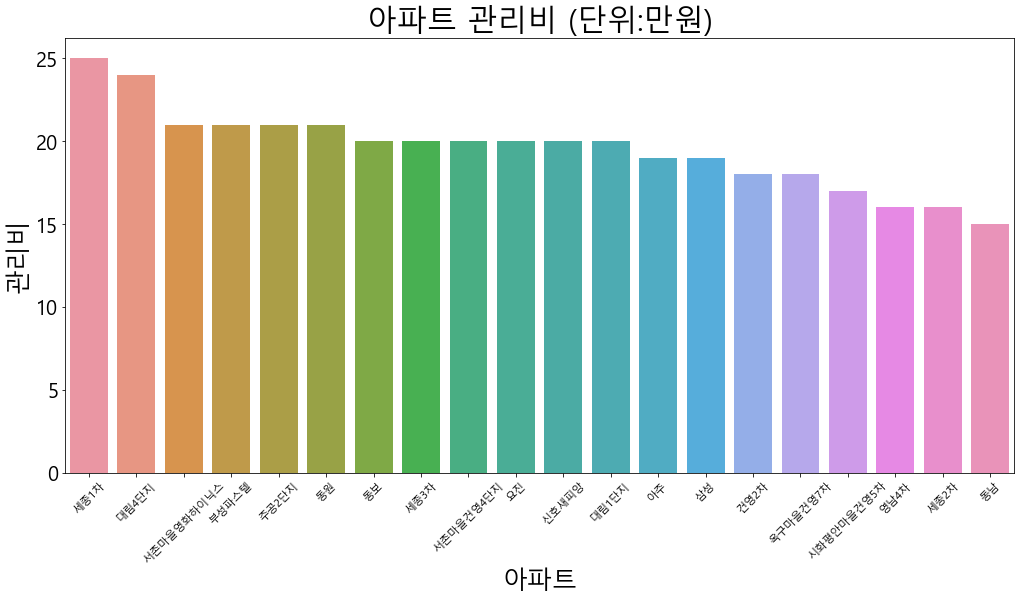

In [34]:
#막대그래프로 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(17,8))
plt.title('아파트 관리비 (단위:만원)', fontsize=30)
plt.rc('font', size=20)        # 기본 폰트 크기
plt.rc('axes', labelsize=25)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=11)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=20)  # y축 눈금 폰트 크기
plt.xticks(rotation=45)
sns.barplot(x='아파트',y='관리비', data=result_2)

In [1]:
!pip list

Package             Version
------------------- ---------
argcomplete         1.12.3
argon2-cffi         20.1.0
async-generator     1.10
attrs               21.2.0
backcall            0.2.0
beautifulsoup4      4.9.3
bleach              4.0.0
certifi             2021.10.8
cffi                1.15.0
charset-normalizer  2.0.10
colorama            0.4.4
cycler              0.11.0
debugpy             1.5.1
decorator           5.1.0
defusedxml          0.7.1
entrypoints         0.3
fonttools           4.28.5
html5lib            1.1
idna                3.3
importlib-metadata  4.8.2
ipykernel           6.4.1
ipython             7.29.0
ipython-genutils    0.2.0
ipywidgets          7.6.5
jedi                0.18.0
Jinja2              3.0.2
jsonschema          3.2.0
jupyter             1.0.0
jupyter-client      7.1.0
jupyter-console     6.4.0
jupyter-core        4.9.1
jupyterlab-pygments 0.1.2
jupyterlab-widgets  1.0.0
kiwisolver          1.3.2
MarkupSafe          2.0.1
matplotlib          3.5.1
